# 04차시 시계열 분석

## 01 시계열 분석 개요

### 평활화(Smoothing)

- 시계열 데이터를 일련의 정제법을 사용하여 보다 부드럽게 만드는 과정
- 이동 평균법은 단순이동평균법(Simple Moving Average), 가중이동평균법(Weighted Moving Average)이 있음
- 지수 평활법은 단순/이중/삼중 지수 평활법이 있으며 각각 EWMA, Winters, HoltWinters로 불림

### 시계열 분해(Time Series Decomposition)

- 시계열 데이털르 일련의 공식을 활용하여 추세, 변동 등 세부 시계열 요소로 분리하는 일련의 과정
- 고전 시계열 분해법은 가법모형(Addictive Model)과 승법모형(Multiplicative Model)이 있음

## 02 데이터 소개

### 서울시 지하철 승하차 데이터 - seoul_subway.csv

- 서울시 열린데이터 광자에서 제공하는 지하철 호선별 역별 승하차 인원 정보
- 2019년 12월부터 2020년 11월까지 1년간 일단위로 기록된 데이터

## 03 주요 함수 및 메서드 소개

### pandas - rolling()

- 단순이동평균을 수행하는 pandas의 메서드
- window에는 이동평균 대상이 되는 데이터 개수를 지정
- 뒤에 붙이는 메서드에 따라서 각 구간의 연산 결과가 달라짐
- center에 True를 입력할 경우 중심 이동평균 실시 가능

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("실습파일/seoul_subway.csv")
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [3]:
df_sub = df.loc[(df["노선명"] == "1호선") & (df["역명"] == "종로3가")]
df_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
1,20191201,1호선,종로3가,19646,17772,20191204
593,20191202,1호선,종로3가,34277,32405,20191205
1184,20191203,1호선,종로3가,34957,32832,20191206
1776,20191204,1호선,종로3가,36007,33498,20191207
2426,20191205,1호선,종로3가,35536,33702,20191208


In [5]:
df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window = 5).mean()
df_sub.head(8)

C:\Users\jtkim\AppData\Local\Temp\ipykernel_10752\582120441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["MA_5"] = df_sub["승차총승객수"].rolling(window = 5).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5
1,20191201,1호선,종로3가,19646,17772,20191204,NaN
593,20191202,1호선,종로3가,34277,32405,20191205,NaN
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2


### pandas - ewm()  Exponential Weighted Moving

- 단순이동평균을 수행하는 pandas의 메서드
- alpha에는 지수평활계수 입력
- 뒤에 붙이는 메서드에 따라서 각 구간의 연산 결과가 달라짐

In [6]:
df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.1).mean()
df_sub.head(8)

C:\Users\jtkim\AppData\Local\Temp\ipykernel_10752\1175654592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.1).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5,EWMA_01
1,20191201,1호선,종로3가,19646,17772,20191204,NaN,19646.000000
593,20191202,1호선,종로3가,34277,32405,20191205,NaN,27346.526316
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN,30154.819188
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN,31856.529224
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6,32755.034944
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8,33499.224055
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8,34301.936545
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2,32283.977835


In [7]:
df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.9).mean()
df_sub.head(8)

C:\Users\jtkim\AppData\Local\Temp\ipykernel_10752\1404898533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["EWMA_01"] = df_sub["승차총승객수"].ewm(alpha = 0.9).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,MA_5,EWMA_01
1,20191201,1호선,종로3가,19646,17772,20191204,NaN,19646.000000
593,20191202,1호선,종로3가,34277,32405,20191205,NaN,32946.909091
1184,20191203,1호선,종로3가,34957,32832,20191206,NaN,34757.801802
1776,20191204,1호선,종로3가,36007,33498,20191207,NaN,35882.192619
2426,20191205,1호선,종로3가,35536,33702,20191208,32084.6,35570.616146
2960,20191206,1호선,종로3가,36242,35437,20191209,35403.8,36174.862219
3602,20191207,1호선,종로3가,37687,36926,20191210,36085.8,37535.786358
4142,20191208,1호선,종로3가,22809,19859,20191211,33656.2,24281.678503


### statsmodel - seasonal_decompose()

- 시계열 분해를 위한 statsmodels의 함수
- model 인자에 "multiplicative"를 입력하면 승법모형 적용(기본은 가법모형)
- 입력하는 시계열 데이터는 pandas의 시리즈이며 인덱스는 시간 데이터 필수

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
df = pd.read_csv("실습파일/seoul_subway.csv")
df.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [10]:
df = df.set_index("사용일자")
df.head()

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191201,1호선,종로3가,19646,17772,20191204
20191201,1호선,종로5가,13716,13149,20191204
20191201,1호선,동대문,11040,13079,20191204
20191201,1호선,신설동,8498,8322,20191204


In [11]:
df_sub = df.loc[(df["노선명"] == "1호선") & (df["역명"] == "종각"),]
df_sub.head()

,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,
20191201,1호선,종각,19093,17141,20191204
20191202,1호선,종각,48153,46770,20191205
20191203,1호선,종각,49696,47715,20191206
20191204,1호선,종각,49877,48664,20191207
20191205,1호선,종각,51426,49816,20191208


In [13]:
df_sub = df_sub.reset_index()
df_sub.head()

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,0,20191201,1호선,종각,19093,17141,20191204
1,1,20191202,1호선,종각,48153,46770,20191205
2,2,20191203,1호선,종각,49696,47715,20191206
3,3,20191204,1호선,종각,49877,48664,20191207
4,4,20191205,1호선,종각,51426,49816,20191208


In [14]:
df_sub["사용일자"] = pd.to_datetime(df_sub["사용일자"], format = "%Y%m%d")
df_sub.head()

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,0,2019-12-01,1호선,종각,19093,17141,20191204
1,1,2019-12-02,1호선,종각,48153,46770,20191205
2,2,2019-12-03,1호선,종각,49696,47715,20191206
3,3,2019-12-04,1호선,종각,49877,48664,20191207
4,4,2019-12-05,1호선,종각,51426,49816,20191208


In [15]:
df_sub = df_sub.set_index("사용일자")
df_sub.head()

,index,노선명,역명,승차총승객수,하차총승객수,등록일자
사용일자,,,,,,
2019-12-01,0,1호선,종각,19093,17141,20191204
2019-12-02,1,1호선,종각,48153,46770,20191205
2019-12-03,2,1호선,종각,49696,47715,20191206
2019-12-04,3,1호선,종각,49877,48664,20191207
2019-12-05,4,1호선,종각,51426,49816,20191208


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEU

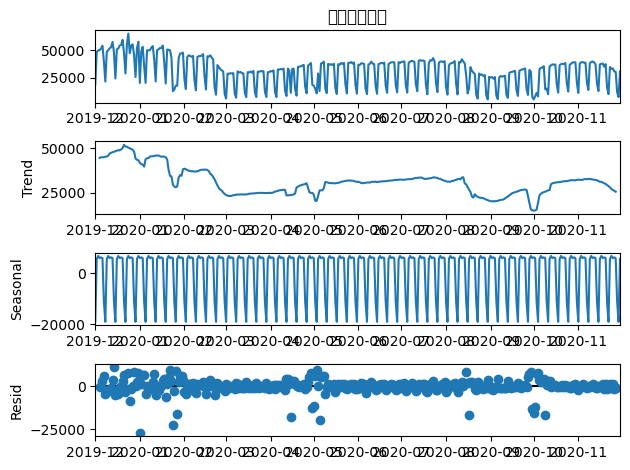

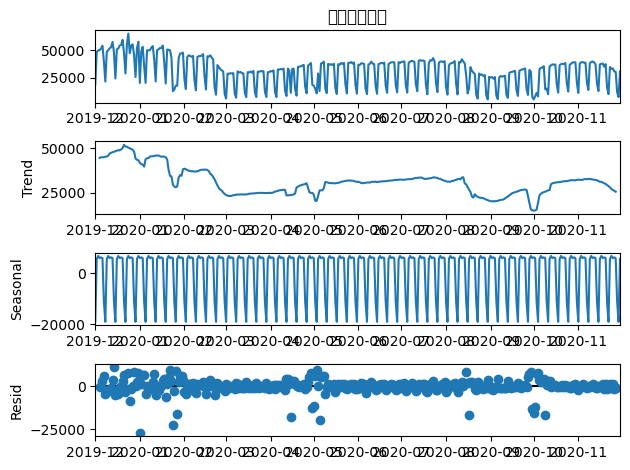

In [16]:
result = seasonal_decompose(df_sub["승차총승객수"])
result.plot()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:338: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.tight_layout()
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEU

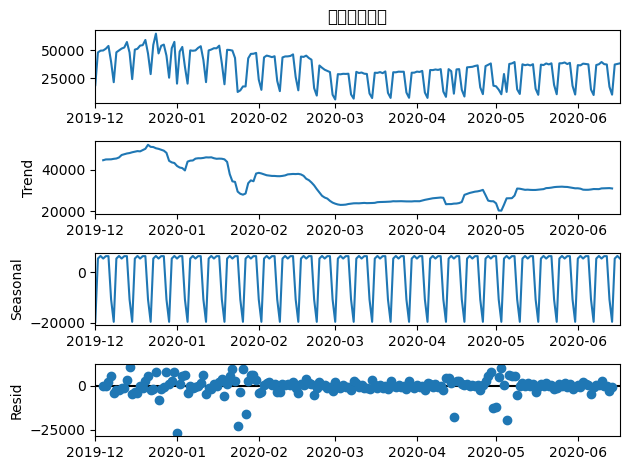

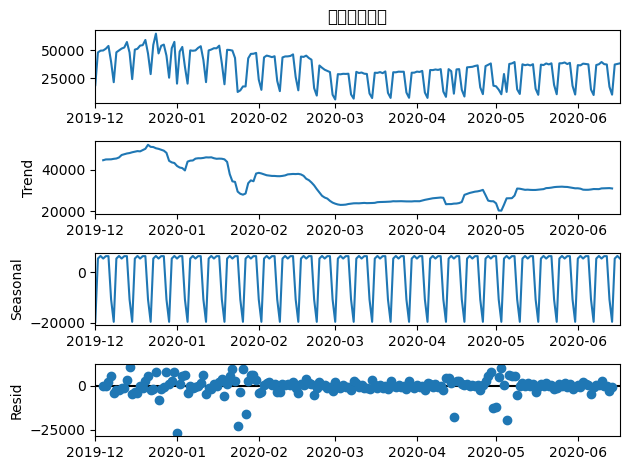

In [17]:
result = seasonal_decompose(df_sub["승차총승객수"][:200])
result.plot()

<AxesSubplot:xlabel='사용일자'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


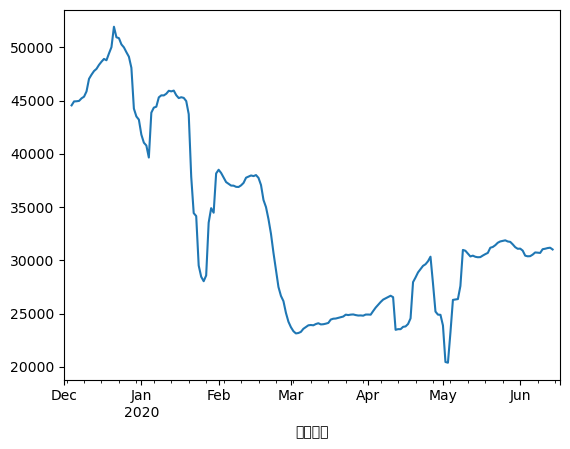

In [18]:
result.trend.plot()

## Q1 rolling() 메서드의 window에 정수 n을 입력하는 경우 출력 데이터 세트의 결측치는 총 몇 개인가?

정답 : n-1

## Q2 6호선 이태원역 데이터를 활용하여 EWMA를 실시했을 때 지수 평활계수가 0.1과 0.9로 설정한 결과를 비교하고자 한다. 2020년 11월 30일 기준 산출값 차이의 절대값은?
1) 하차 데이터 사용

In [19]:
Q2 = pd.read_csv("실습파일/seoul_subway.csv")
Q2.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [20]:
Q2_sub = Q2.loc[(Q2["노선명"] == "6호선") & (Q2["역명"] == "이태원")]
Q2_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
439,20191201,6호선,이태원,15817,12541,20191204
1030,20191202,6호선,이태원,12771,12974,20191205
1621,20191203,6호선,이태원,12871,13565,20191206
2214,20191204,6호선,이태원,13424,14227,20191207
2863,20191205,6호선,이태원,13478,14757,20191208


In [24]:
Q2_sub["EWM_01"] = Q2_sub["하차총승객수"].ewm(alpha = 0.1).mean()
Q2_sub["EWM_09"] = Q2_sub["하차총승객수"].ewm(alpha = 0.9).mean()
Q2_sub.tail()

C:\Users\jtkim\AppData\Local\Temp\ipykernel_10752\1033251681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_sub["EWM_01"] = Q2_sub["하차총승객수"].ewm(alpha = 0.1).mean()
C:\Users\jtkim\AppData\Local\Temp\ipykernel_10752\1033251681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_sub["EWM_09"] = Q2_sub["하차총승객수"].ewm(alpha = 0.9).mean()


,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,EWM_01,EWM_09
214412,20201126,6호선,이태원,7641,7780,20201129,8943.937137,7798.461899
214887,20201127,6호선,이태원,8140,8537,20201130,8903.243423,8463.146190
215582,20201128,6호선,이태원,6392,6513,20201201,8664.219081,6708.014619
216071,20201129,6호선,이태원,5239,4996,20201202,8297.397173,5167.201462
216590,20201130,6호선,이태원,7059,7109,20201203,8178.557456,6914.820146


## Q3 3호선 신사역 승차 총 승객수를 활용하여 시계열분해 가법모형을 실시하였을 때 2020년 11월 30일의 추세값은?
1) 하차 데이터 사용  
2) extrapolate_trend = 1 설정

In [71]:
Q3 = pd.read_csv("실습파일/seoul_subway.csv")
Q3.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20191201,1호선,종각,19093,17141,20191204
1,20191201,1호선,종로3가,19646,17772,20191204
2,20191201,1호선,종로5가,13716,13149,20191204
3,20191201,1호선,동대문,11040,13079,20191204
4,20191201,1호선,신설동,8498,8322,20191204


In [72]:
Q3_sub = Q3.loc[(Q3["노선명"] == "3호선") & (Q3["역명"] == "신사")]
Q3_sub.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
76,20191201,3호선,신사,18120,18435,20191204
668,20191202,3호선,신사,34918,37450,20191205
1258,20191203,3호선,신사,36095,38205,20191206
1851,20191204,3호선,신사,35617,38286,20191207
2501,20191205,3호선,신사,35749,38480,20191208


In [76]:
Q3_sub = Q3_sub.reset_index()
Q3_sub.head()

,level_0,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,date
0,0,76,20191201,3호선,신사,18120,18435,20191204,2019-12-01
1,1,668,20191202,3호선,신사,34918,37450,20191205,2019-12-02
2,2,1258,20191203,3호선,신사,36095,38205,20191206,2019-12-03
3,3,1851,20191204,3호선,신사,35617,38286,20191207,2019-12-04
4,4,2501,20191205,3호선,신사,35749,38480,20191208,2019-12-05


In [77]:
Q3_sub["date"] = pd.to_datetime(Q3_sub["사용일자"], format = "%Y%m%d")
Q3_sub.head()

,level_0,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,date
0,0,76,20191201,3호선,신사,18120,18435,20191204,2019-12-01
1,1,668,20191202,3호선,신사,34918,37450,20191205,2019-12-02
2,2,1258,20191203,3호선,신사,36095,38205,20191206,2019-12-03
3,3,1851,20191204,3호선,신사,35617,38286,20191207,2019-12-04
4,4,2501,20191205,3호선,신사,35749,38480,20191208,2019-12-05


In [78]:
Q3_sub = Q3_sub.set_index("date")
Q3_sub.head()

,level_0,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
date,,,,,,,,
2019-12-01,0,76,20191201,3호선,신사,18120,18435,20191204
2019-12-02,1,668,20191202,3호선,신사,34918,37450,20191205
2019-12-03,2,1258,20191203,3호선,신사,36095,38205,20191206
2019-12-04,3,1851,20191204,3호선,신사,35617,38286,20191207
2019-12-05,4,2501,20191205,3호선,신사,35749,38480,20191208


In [80]:
td = seasonal_decompose(Q3_sub["하차총승객수"],
                       model = "addictive",
                       extrapolate_trend = 1)
td.trend.tail()

date
2020-11-26    24229.571429
2020-11-27    23740.857143
2020-11-28    23108.428571
2020-11-29    22547.857143
2020-11-30    21987.285714
Name: trend, dtype: float64